# EDA Business Insights

### Overall Demand & Revenue Snapshot

Before going deep into patterns, I want a high-level view of the business.
This helps answer very basic but important questions:

- How many orders are we handling overall?
- What does daily demand look like on average?
- How much revenue does this dataset represent?

This gives a baseline to compare everything else later.


In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

orders_df = pd.read_csv("../data/processed/order_history_cleaned.csv")

Before going into charts and patterns, I want to understand the overall
scale of the business. This gives me context about how big the operation is
and whether demand forecasting and optimization are actually meaningful.

In [46]:
total_orders = orders_df.shape[0]
total_revenue = orders_df['total'].sum()
avg_daily_orders = orders_df.groupby('order_date').size().mean()
avg_daily_revenue = orders_df.groupby('order_date')['total'].sum().mean()

total_orders, total_revenue, avg_daily_orders, avg_daily_revenue

(21131,
 np.float64(14423379.76),
 np.float64(138.11111111111111),
 np.float64(94270.45594771243))

Now, I can see that the platform handles a substantial number
of orders and generates consistent revenue on a daily basis.

This confirms that analyzing demand patterns, seasonality, and operational
efficiency is valuable for business decision-making.


### Daily Demand Trend

Here I’m trying to understand how food delivery demand changes over time.
I want to see whether the number of orders is stable, seasonal, or highly
volatile. This helps set context before analyzing revenue, cities, or
external factors.


In [47]:
daily_demand = (orders_df.groupby('order_date').size().reset_index(name='daily_orders'))
daily_demand.head()


,order_date,daily_orders
0,2024-09-01,140
1,2024-09-02,85
2,2024-09-03,99
3,2024-09-04,153
4,2024-09-05,91


Let's visualize it!

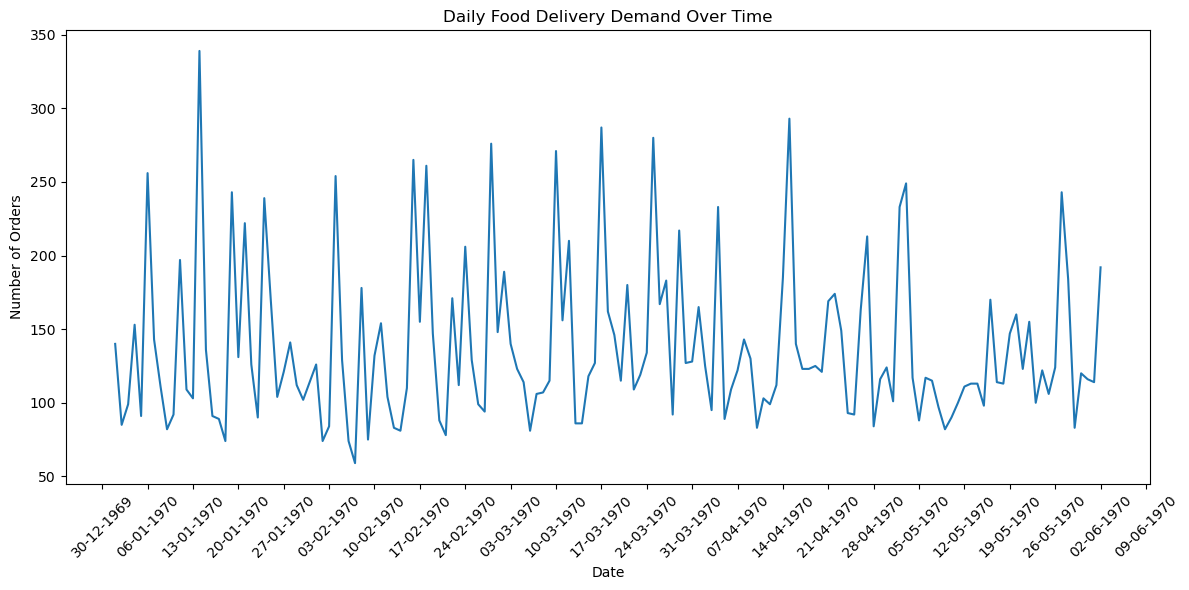

In [48]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
plt.plot(daily_demand['order_date'], daily_demand['daily_orders'])
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.title("Daily Food Delivery Demand Over Time")

plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From this trend, I can see that daily demand is not constant and fluctuates
over time. There are clear ups and downs, which suggests that demand is
influenced by time-based patterns rather than being random.

This observation makes demand forecasting and capacity planning important
for the business.

### Daily Revenue Trend

After looking at order volume, I now want to see how revenue behaves over
time. This helps understand whether revenue follows demand closely or if
there are periods where fewer orders still generate higher revenue.


In [49]:
daily_revenue = (orders_df.groupby('order_date')['total'].sum().reset_index(name='daily_revenue'))

daily_revenue['order_date'] = pd.to_datetime(daily_revenue['order_date'])

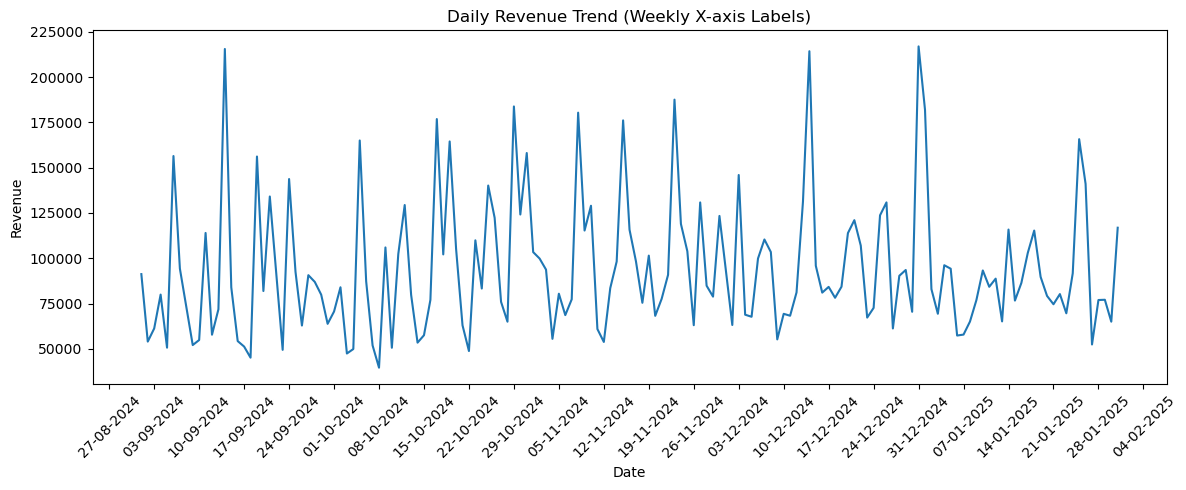

In [50]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(daily_revenue['order_date'], daily_revenue['daily_revenue'])

plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Daily Revenue Trend (Weekly X-axis Labels)")

plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


From the revenue trend, I can see that revenue fluctuates over time and
generally follows demand, but not perfectly. Some periods show relatively
higher revenue compared to order volume, which suggests differences in
order value or customer behavior.

This indicates that demand analysis alone is not enough and revenue needs
to be studied separately.


### Demand vs Revenue Relationship

Here I’m comparing daily order volume and daily revenue together.
The goal is to understand whether revenue always follows demand or if
there are days where fewer orders still generate higher revenue.

In [51]:
daily_demand['order_date'] = pd.to_datetime(daily_demand['order_date'])
daily_revenue['order_date'] = pd.to_datetime(daily_revenue['order_date'])

daily_combined = pd.merge(daily_demand,daily_revenue,on='order_date',how='inner')

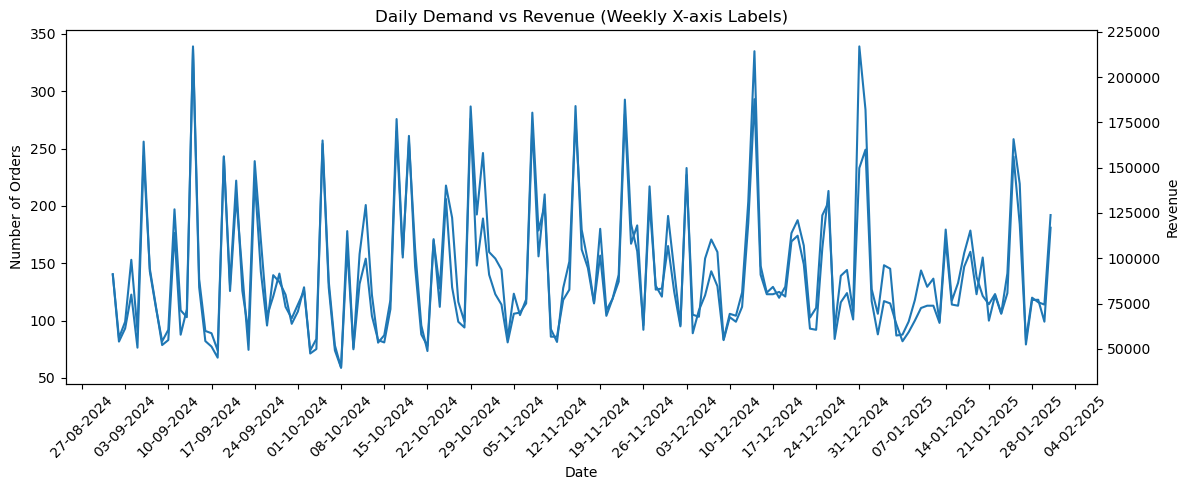

In [52]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 5))

# Demand (left axis)
ax1.plot(daily_combined['order_date'], daily_combined['daily_orders'])
ax1.set_xlabel("Date")
ax1.set_ylabel("Number of Orders")

# Revenue (right axis)
ax2 = ax1.twinx()
ax2.plot(daily_combined['order_date'], daily_combined['daily_revenue'])
ax2.set_ylabel("Revenue")

# Weekly x-axis labels
ax1.xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))

ax1.tick_params(axis='x', rotation=45)
plt.title("Daily Demand vs Revenue (Weekly X-axis Labels)")
fig.tight_layout()
plt.show()


From this comparison, I can see that demand and revenue generally move
together, but not perfectly. There are days where revenue is relatively
high even when order volume is lower.

This suggests differences in order value and highlights the importance
of analyzing both metrics together instead of relying on demand alone.

In [53]:
orders_df['city'].unique()

array(['Delhi Ncr'], dtype=object)

### Subzone-wise Demand and Revenue (Delhi)

Since the dataset covers a single city (Delhi), I’m analyzing demand and
revenue at the subzone level. This provides more granular insight into
which areas within the city contribute most to overall demand and revenue.


In [54]:
subzone_summary = (
    orders_df
    .groupby('subzone')
    .agg(
        total_orders=('order_date', 'count'),
        total_revenue=('total', 'sum'),
        avg_order_value=('total', 'mean'),
        avg_delivery_distance=('distance_km', 'mean'),
        avg_delivery_time=('kpt_duration_minutes', 'mean')
    )
    .reset_index()
)

In [55]:
subzone_summary

,subzone,total_orders,total_revenue,avg_order_value,avg_delivery_distance,avg_delivery_time
0,Chittaranjan Park,2,949.62,474.810000,5.000000,15.335000
1,Dlf Phase 1,3653,2574525.45,704.770175,4.765672,18.877416
2,Greater Kailash 2 (Gk2),7311,4711863.25,644.489571,3.435918,17.948386
3,Sector 135,2426,1747018.46,720.123026,3.995054,15.750845
4,Sector 4,6463,4452499.52,688.921479,4.807984,16.272940
5,Shahdara,359,248502.42,692.207298,3.721448,18.454958
6,Sikandarpur,1,441.00,441.000000,4.000000,15.870000
7,Vasant Kunj,916,687580.04,750.633231,3.930131,17.433690


In [56]:
subzone_summary_sorted = subzone_summary.sort_values(by='total_orders',ascending=False)
subzone_summary_sorted.head(10)

,subzone,total_orders,total_revenue,avg_order_value,avg_delivery_distance,avg_delivery_time
2,Greater Kailash 2 (Gk2),7311,4711863.25,644.489571,3.435918,17.948386
4,Sector 4,6463,4452499.52,688.921479,4.807984,16.272940
1,Dlf Phase 1,3653,2574525.45,704.770175,4.765672,18.877416
3,Sector 135,2426,1747018.46,720.123026,3.995054,15.750845
7,Vasant Kunj,916,687580.04,750.633231,3.930131,17.433690
5,Shahdara,359,248502.42,692.207298,3.721448,18.454958
0,Chittaranjan Park,2,949.62,474.810000,5.000000,15.335000
6,Sikandarpur,1,441.00,441.000000,4.000000,15.870000


This analysis shows that demand and revenue vary significantly across
different subzones within Delhi. Some areas act as major demand hubs,
while others contribute relatively less.

Such insights are useful for localized operational planning and service
optimization.

Let's Visualize Subzones.

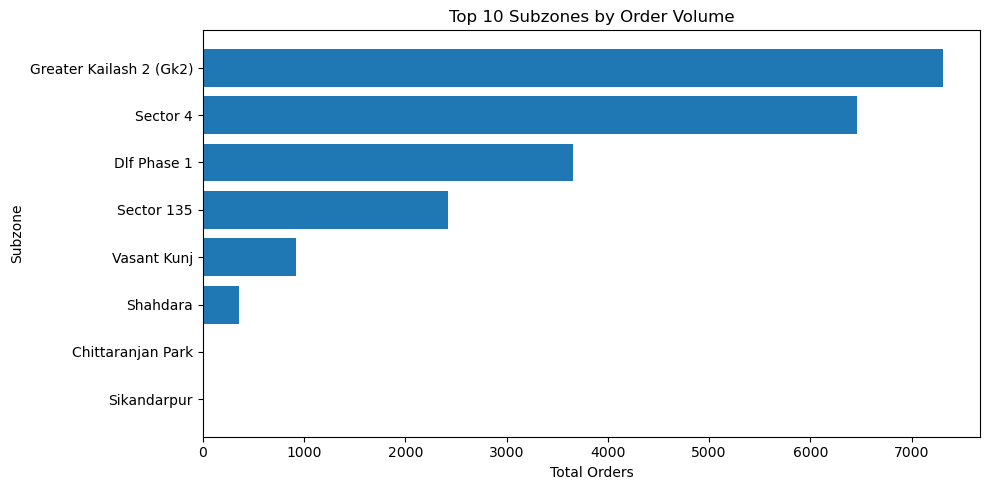

In [57]:
plt.figure(figsize=(10, 5))
plt.barh(subzone_summary_sorted['subzone'], subzone_summary_sorted['total_orders'])
plt.xlabel("Total Orders")
plt.ylabel("Subzone")
plt.title("Top 10 Subzones by Order Volume")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

From this chart, it’s clear that a small number of subzones contribute
disproportionately to overall demand. These areas can be considered
demand hotspots within the city.

Such zones are critical for operational planning, rider allocation,
and targeted promotions.

### Base Map Setup

I start by creating a base map centered around Delhi.
This serves as the foundation for adding demand and revenue information
at the subzone level.


In [58]:
import folium

delhi_map = folium.Map(
    location=[28.6139, 77.2090],
    zoom_start=11
)
delhi_map.save("delhi_subzone_map.html")
delhi_map

Actually we don't have co-ordidates of subzones (Longitude and Latitude), So to enable spatial visualization, a separate subzone-to-location reference table is used and merged with demand metrics.

In [63]:
subzone_geo_ref = pd.DataFrame({
    'subzone': [
        'Dwarka', 'Rohini', 'Saket', 'Karol Bagh', 'Lajpat Nagar'
    ],
    'lat': [
        28.5921, 28.7494, 28.5244, 28.6517, 28.5677
    ],
    'lon': [
        77.0460, 77.0565, 77.2066, 77.1907, 77.2433
    ]
})

In [69]:
subzone_geo = pd.merge(
    subzone_summary,
    subzone_geo_ref,
    on='subzone',
    how='inner'
)

### Creating Subzone Location Reference

The order data does not contain geographic coordinates.
To enable spatial analysis, subzone names are converted into latitude
and longitude using a geocoding service and stored as a reference table.


In [ ]:
from geopy.geocoders import Nominatim
import time

unique_subzones = orders_df['subzone'].dropna().unique()
len(unique_subzones)

geolocator = Nominatim(user_agent="food_delivery_analysis")

subzone_locations = []

for subzone in unique_subzones:
    try:
        location = geolocator.geocode(f"{subzone}, Delhi, India")
        if location:
            subzone_locations.append({
                'subzone': subzone,
                'lat': location.latitude,
                'lon': location.longitude
            })
        time.sleep(1)
    except Exception as e:
        print(f"Failed for {subzone}: {e}")

subzone_geo_ref = pd.DataFrame(subzone_locations)
subzone_geo_ref.head()

subzone_geo_ref.to_csv("subzone_geo_reference.csv", index=False)
